In [1]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, kendalltau


from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr, kendalltau


def PCC(predictions, targets):
    return pearsonr(predictions, targets)[0]


def SROCC(predictions, targets):
    return spearmanr(predictions, targets)[0]


def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [2]:
df_train = pd.read_csv("features/reference_APSIPA.csv")
df_validate = pd.read_csv("features/UnB.csv")    

In [3]:
from IPython.display import Markdown, display

display(df_train.corr())
display(df_validate.corr())


SCORE    d_mseF  d_mseF_PSNR     d_mmd  d_mmd_PSNR  \
SCORE          1.000000 -0.484103     0.428627 -0.616849    0.409324   
d_mseF        -0.484103  1.000000    -0.147504  0.948787   -0.286798   
d_mseF_PSNR    0.428627 -0.147504     1.000000 -0.212858    0.127729   
d_mmd         -0.616849  0.948787    -0.212858  1.000000   -0.381776   
d_mmd_PSNR     0.409324 -0.286798     0.127729 -0.381776    1.000000   
d_msmd        -0.488064  0.957726    -0.137845  0.973323   -0.324734   
d_msmd_PSNR    0.421377 -0.285874     0.141408 -0.384417    0.999245   
d_pl2plMIN     0.152862 -0.050458     0.342624 -0.070954    0.166675   
d_pl2plMAX          NaN       NaN          NaN       NaN         NaN   
d_pl2plMEAN    0.525382 -0.317655     0.465036 -0.300485   -0.077301   
d_pl2plMEDIAN  0.673176 -0.358785     0.582581 -0.391339    0.151469   
d_pl2plRMS     0.605489 -0.344353     0.522738 -0.361740    0.029472   
d_pl2plMSE     0.615475 -0.340065     0.547778 -0.362465    0.050039   

                 d_msmd  d_msmd_PSNR  d_pl2plMIN  d_pl2plMAX  d_pl2plMEAN  \
SCORE         -0.488064     0.421377    0.152862         NaN     0.525382   
d_mseF         0.957726    -0.285874   -0.050458         NaN    -0.317655   
d_mseF_PSNR   -0.137845     0.141408    0.342624         NaN     0.465036   
d_mmd          0.973323    -0.384417   -0.070954         NaN    -0.300485   
d_mmd_PSNR    -0.324734     0.999245    0.166675         NaN    -0.077301   
d_msmd         1.000000    -0.327096   -0.046773         NaN    -0.260428   
d_msmd_PSNR   -0.327096     1.000000    0.171422         NaN    -0.062834   
d_pl2plMIN    -0.046773     0.171422    1.000000         NaN     0.262069   
d_pl2plMAX          NaN          NaN         NaN         NaN          NaN   
d_pl2plMEAN   -0.260428    -0.062834    0.262069         NaN     1.000000   
d_pl2plMEDIAN -0.323364     0.166385    0.259244         NaN     0.928873   
d_pl2plRMS    -0.305762     0.045036    0.282786         NaN     0.981826   
d_pl2plMSE    -0.303437     0.065503    0.309538         NaN     0.976405   

               d_pl2plMEDIAN  d_pl2plRMS  d_pl2plMSE  
SCORE               0.673176    0.605489    0.615475  
d_mseF             -0.358785   -0.344353   -0.340065  
d_mseF_PSNR         0.582581    0.522738    0.547778  
d_mmd              -0.391339   -0.361740   -0.362465  
d_mmd_PSNR          0.151469    0.029472    0.050039  
d_msmd             -0.323364   -0.305762   -0.303437  
d_msmd_PSNR         0.166385    0.045036    0.065503  
d_pl2plMIN          0.259244    0.282786    0.309538  
d_pl2plMAX               NaN         NaN         NaN  
d_pl2plMEAN         0.928873    0.981826    0.976405  
d_pl2plMEDIAN       1.000000    0.966058    0.968893  
d_pl2plRMS          0.966058    1.000000    0.998033  
d_pl2plMSE          0.968893    0.998033    1.000000

SCORE    d_mseF  d_mseF_PSNR  d_mmd  d_mmd_PSNR  d_msmd  \
SCORE          1.000000 -0.766874     0.577300    NaN         NaN     NaN   
d_mseF        -0.766874  1.000000    -0.331813    NaN         NaN     NaN   
d_mseF_PSNR    0.577300 -0.331813     1.000000    NaN         NaN     NaN   
d_mmd               NaN       NaN          NaN    NaN         NaN     NaN   
d_mmd_PSNR          NaN       NaN          NaN    NaN         NaN     NaN   
d_msmd              NaN       NaN          NaN    NaN         NaN     NaN   
d_msmd_PSNR         NaN       NaN          NaN    NaN         NaN     NaN   
d_pl2plMIN     0.577058 -0.331636     1.000000    NaN         NaN     NaN   
d_pl2plMAX          NaN       NaN          NaN    NaN         NaN     NaN   
d_pl2plMEAN    0.788464 -0.694037     0.636032    NaN         NaN     NaN   
d_pl2plMEDIAN  0.813376 -0.733659     0.524921    NaN         NaN     NaN   
d_pl2plRMS     0.810753 -0.714309     0.646592    NaN         NaN     NaN   
d_pl2plMSE     0.807910 -0.694162     0.671793    NaN         NaN     NaN   

               d_msmd_PSNR  d_pl2plMIN  d_pl2plMAX  d_pl2plMEAN  \
SCORE                  NaN    0.577058         NaN     0.788464   
d_mseF                 NaN   -0.331636         NaN    -0.694037   
d_mseF_PSNR            NaN    1.000000         NaN     0.636032   
d_mmd                  NaN         NaN         NaN          NaN   
d_mmd_PSNR             NaN         NaN         NaN          NaN   
d_msmd                 NaN         NaN         NaN          NaN   
d_msmd_PSNR            NaN         NaN         NaN          NaN   
d_pl2plMIN             NaN    1.000000         NaN     0.635898   
d_pl2plMAX             NaN         NaN         NaN          NaN   
d_pl2plMEAN            NaN    0.635898         NaN     1.000000   
d_pl2plMEDIAN          NaN    0.524685         NaN     0.944085   
d_pl2plRMS             NaN    0.646432         NaN     0.994106   
d_pl2plMSE             NaN    0.671634         NaN     0.990085   

               d_pl2plMEDIAN  d_pl2plRMS  d_pl2plMSE  
SCORE               0.813376    0.810753    0.807910  
d_mseF             -0.733659   -0.714309   -0.694162  
d_mseF_PSNR         0.524921    0.646592    0.671793  
d_mmd                    NaN         NaN         NaN  
d_mmd_PSNR               NaN         NaN         NaN  
d_msmd                   NaN         NaN         NaN  
d_msmd_PSNR              NaN         NaN         NaN  
d_pl2plMIN          0.524685    0.646432    0.671634  
d_pl2plMAX               NaN         NaN         NaN  
d_pl2plMEAN         0.944085    0.994106    0.990085  
d_pl2plMEDIAN       1.000000    0.960582    0.953739  
d_pl2plRMS          0.960582    1.000000    0.998444  
d_pl2plMSE          0.953739    0.998444    1.000000

In [4]:
# ALL DISTANCES as MODEL only valid distances
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


def RFR(df):
    X_train, y_train = df[d].values, df.SCORE.values
    regressor = RandomForestRegressor(
        n_estimators=X_train.shape[1],
        min_samples_split=2,
        max_features='sqrt'
    )
    regressor.fit(X_train, y_train)
    return regressor


    
d = ["d_pl2plMEAN", "d_pl2plMEDIAN", "d_pl2plRMS", "d_pl2plMSE", "d_mseF", "d_mseF_PSNR"]
X_test, y_true = df_validate[d].values, df_validate.SCORE.values

rfr = RFR(df_train)
y_pred = rfr.predict(X_test)

display({
    'PCC' : PCC(y_true, y_pred),
    'SROCC' : SROCC(y_true, y_pred),
    'RMSE' : RMSE(y_true, y_pred),
    'max_error' : max_error(y_true, y_pred),
    'explained_variance_score' : explained_variance_score(y_true, y_pred),
    'mean_absolute_error' : mean_absolute_error(y_true, y_pred),
    'r2_score' : r2_score(y_true, y_pred),
})

display(Markdown('---'))

{'PCC': 0.7805553011372512,
 'SROCC': 0.7987086463410776,
 'RMSE': 1.1775896772291556,
 'max_error': 2.3708333333333336,
 'explained_variance_score': 0.6067486141897938,
 'mean_absolute_error': 0.983553240740741,
 'r2_score': 0.0946263430146912}

---

{'PCC': 0.7778600401096392,
 'SROCC': 0.7523793849361845,
 'RMSE': 1.0165620035560246,
 'max_error': 1.9769675925925925,
 'explained_variance_score': 0.545375084154955,
 'mean_absolute_error': 0.7821052263708511,
 'r2_score': 0.3253048010584396}

---

Feature ranking:
1. feature 4 (0.243055)
2. feature 2 (0.194061)
3. feature 0 (0.151416)
4. feature 10 (0.116395)
5. feature 9 (0.097688)
6. feature 11 (0.080275)
7. feature 8 (0.037720)
8. feature 3 (0.030040)
9. feature 1 (0.028595)
10. feature 5 (0.020753)
11. feature 7 (0.000000)
12. feature 6 (0.000000)


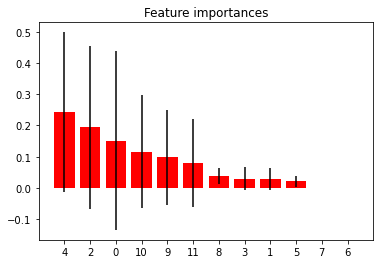

In [5]:
# ALL DISTANCES as MODEL all distances
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


np.random.seed(123)

def RFR(df):
    X_train, y_train = df[d].values, df.SCORE.values
    regressor = RandomForestRegressor(
        n_estimators=X_train.shape[1],
        min_samples_split=2,
        max_features='sqrt'
    )
    regressor.fit(X_train, y_train)
    return regressor


    
d = [col for col in df_validate if col.startswith('d_')]
X_test, y_true = df_validate[d].values, df_validate.SCORE.values

rfr = RFR(df_train)
y_pred = rfr.predict(X_test)

display({
    'PCC' : PCC(y_true, y_pred),
    'SROCC' : SROCC(y_true, y_pred),
    'RMSE' : RMSE(y_true, y_pred),
    'max_error' : max_error(y_true, y_pred),
    'explained_variance_score' : explained_variance_score(y_true, y_pred),
    'mean_absolute_error' : mean_absolute_error(y_true, y_pred),
    'r2_score' : r2_score(y_true, y_pred),
})

display(Markdown('---'))


importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [6]:
# ALL DISTANCES as MODEL
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFwe, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeRegressor
from tpot.builtins import StackingEstimator

np.random.seed(0)

def TPOT(X_train, y_train):
    regressor = make_pipeline(
        StackingEstimator(
            estimator=GradientBoostingRegressor(alpha=0.85, learning_rate=0.001, loss="quantile", max_depth=9, 
                                                max_features=0.8, min_samples_leaf=9, min_samples_split=6, 
                                                n_estimators=100, subsample=0.8)),
        StackingEstimator(estimator=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=9)),
        SelectFwe(score_func=f_regression, alpha=0.036000000000000004),
        AdaBoostRegressor(learning_rate=0.1, loss="exponential", n_estimators=100))
    regressor.fit(X_train, y_train)
    return regressor




d = [col for col in df_validate if col.startswith('d_')]
X_test, y_true = df_validate[d].values, df_validate.SCORE.values
X_train, y_train = df_train[d].values, df_train.SCORE.values

rfr = TPOT(X_train, y_train)
y_pred = rfr.predict(X_test)

display({
    'PCC' : PCC(y_true, y_pred),
    'SROCC' : SROCC(y_true, y_pred),
    'RMSE' : RMSE(y_true, y_pred),
    'max_error' : max_error(y_true, y_pred),
    'explained_variance_score' : explained_variance_score(y_true, y_pred),
    'mean_absolute_error' : mean_absolute_error(y_true, y_pred),
    'r2_score' : r2_score(y_true, y_pred),
})

display(Markdown('---'))





/opt/conda/Anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/opt/conda/Anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


{'PCC': 0.8005733903929696,
 'SROCC': 0.8033222596760227,
 'RMSE': 0.8447196585319935,
 'max_error': 2.4950000000000006,
 'explained_variance_score': 0.6393404172732844,
 'mean_absolute_error': 0.6821321017774822,
 'r2_score': 0.5341296438826326}

---